In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/kathanbhavsar/Desktop/Python,DS,ML/DATA/penguins_size.csv')

In [5]:
df = df.dropna()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [8]:
X = pd.get_dummies(df.drop('species',axis=1),drop_first=True)
y = df['species']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
model = RandomForestClassifier(n_estimators=10,max_features='auto',random_state=101)##We are going to randomly select a feature so if we want the same result

In [17]:
model.fit(X_train,y_train)

/Users/kathanbhavsar/Desktop/anaconda3/envs/kathan/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_features='auto', n_estimators=10, random_state=101)

In [18]:
pred = model.predict(X_test)

In [21]:
from sklearn.metrics import classification_report,plot_confusion_matrix

In [22]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        49
   Chinstrap       1.00      0.94      0.97        18
      Gentoo       1.00      1.00      1.00        34

    accuracy                           0.99       101
   macro avg       0.99      0.98      0.99       101
weighted avg       0.99      0.99      0.99       101



/Users/kathanbhavsar/Desktop/anaconda3/envs/kathan/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


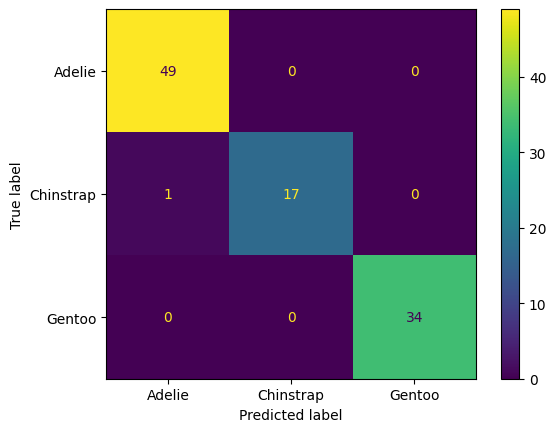

In [23]:
plot_confusion_matrix(model,X_test,y_test)